In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import imdb
from keras import models
from keras import layers

%matplotlib inline

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [9]:
max(max(sequence) for sequence in train_data)

9999

In [10]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
  [(value, key) for (key, value) in word_index.items()]
)

decoded_review = ' '.join(
  [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
    
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
# from keras import optimizers
# model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# using custom losses and metrics
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.01), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [42]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.5150 - acc: 0.7897 - val_loss: 0.3957 - val_acc: 0.8633
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.3130 - acc: 0.8994 - val_loss: 0.3197 - val_acc: 0.8770
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2287 - acc: 0.9268 - val_loss: 0.2913 - val_acc: 0.8848
Epoch 4/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1834 - acc: 0.9393 - val_loss: 0.2723 - val_acc: 0.8898
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1486 - acc: 0.9516 - val_loss: 0.2836 - val_acc: 0.8865
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1229 - acc: 0.9611 - val_loss: 0.2881 - val_acc: 0.8863
Epoch 7/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.1036 - acc: 0.9698 - val_loss: 0.3045 - 

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

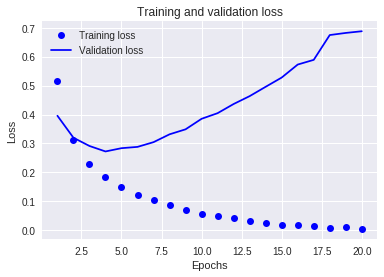

In [44]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

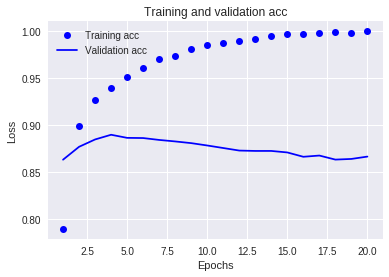

In [45]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4687 - acc: 0.8208
Epoch 2/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.2663 - acc: 0.9080
Epoch 3/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2028 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 3s 104us/step


[0.29130443219184876, 0.88516]

In [48]:
model.predict(x_test)

array([[0.1760079 ],
       [0.9999633 ],
       [0.8754296 ],
       ...,
       [0.0916901 ],
       [0.06645358],
       [0.53418565]], dtype=float32)

In [0]:
# further exp